# **1. PROJECT OVERVIEW**
**Problem Statement:**        
The goal of the **Purchase Value Predictor** is to predict a customer’s purchase value based on their multi-session behavior across digital touchpoints. The dataset captures anonymized user interactions such as browser types, traffic sources, device details, and geographical indicators. By modeling these patterns, the Purchase Value Predictor aims to estimate the purchase potential of each user, helping optimize marketing and engagement strategies.

**Aim:**  
To use the training data (`train.csv`) to build a machine learning model that can accurately 
predict a customer's purchase value based on their multi-session behavior in the test set (`test.csv`).

**Evaluation Metric:** The model's performance is evaluated using the R-squared ($R^2$) score.

**Methodology:** Our approach follows a structured machine learning pipeline:
1.  **Exploratory Data Analysis (EDA):** We will first dive deep into the data to understand its structure, identify patterns, and uncover insights.
2.  **Preprocessing & Feature Engineering:** Based on the EDA, we will clean the data, handle missing values, and engineer new features to improve model performance.
3.  **Model Comparison:** We will train and evaluate three different models (RandomForest, LightGBM, and XGBoost) to identify the best performer.
4.  **Final Model Training & Submission:** The best model will be retrained on the full dataset to create the final submission file.

# 2. SETUP AND DATA LOADING

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning - Models
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Evaluation
from sklearn.metrics import r2_score

# Notebook settings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
df_train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
df_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
sample_submission = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")

print("\nDatasets loaded successfully")

pd.set_option('display.max_rows', 60) 
pd.set_option('display.max_columns', 60) 


Datasets loaded successfully


In [4]:
df_train.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,gclIdPresent,device.operatingSystemVersion,sessionNumber,device.flashVersion,geoNetwork.region,trafficSource,totals.visits,geoNetwork.networkLocation,sessionId,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,trafficSource.adwordsClickInfo.page,geoNetwork.metro,pageViews,locationZone,device.mobileDeviceModel,trafficSource.referralPath,totals.bounces,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,0,not available in demo dataset,1,not available in demo dataset,Washington,youtube.com,1,not available in demo dataset,1500100799,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,NaN,Seattle-Tacoma WA,1.0,8,not available in demo dataset,/intl/hr/yt/about/,1.0,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,California,(direct),1,not available in demo dataset,1495262065,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,NaN,San Francisco-Oakland-San Jose CA,1.0,8,not available in demo dataset,NaN,1.0,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,0,not available in demo dataset,2,not available in demo dataset,Lombardy,google,1,not available in demo dataset,1508510328,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,NaN,(not set),6.0,8,not available in demo dataset,NaN,NaN,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,0,not available in demo dataset,1,not available in demo dataset,not available in demo dataset,youtube.com,1,not available in demo dataset,1483431838,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,NaN,not available in demo dataset,1.0,8,not available in demo dataset,/yt/about/ja/,1.0,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,0,not available 

In [5]:
df_test.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,os,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.continent,locationCountry,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,socialEngagementType,totals.bounces,totalHits,new_visits,pageViews,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,domain2,not available in demo dataset,not available in demo dataset,Northern America,Not Socially Engaged,NaN,11,NaN,10.0,1,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/a/google.com/forum/,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Palo Alto,Americas,United States,San Francisco-Oakland-San Jose CA,domain1,not available in demo dataset,California,Northern America,Not Socially Engaged,NaN,9,1.0,9.0,1,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,Philadelphia,Americas,United States,Philadelphia PA,domain2,not available in demo dataset,Pennsylvania,Northern America,Not Socially Engaged,NaN,2,1.0,2.0,1,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,domain2,not available in demo dataset,not available in demo dataset,Northern America,Not Socially Engaged,NaN,3,NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/document/d/1GSpeJSCBhxRNya7kiUbBKO3rR20jBBBF3...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo da

# **3. EXPLORATORY DATA ANALYSIS**

### Shape of Dataset

In [6]:
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")

Training data shape: (116023, 52)
Test data shape: (29006, 51)


### Training Data Information

In [7]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

### Test Data Information

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

## 3.1 Identify missing values

In [9]:
display(Markdown("Null values in the Train data"))
missing_values = df_train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0]) 

Null values in the Train data

trafficSource.adContent                         113060
trafficSource.adwordsClickInfo.isVideoAd        111742
trafficSource.adwordsClickInfo.page             111742
trafficSource.adwordsClickInfo.adNetworkType    111742
trafficSource.adwordsClickInfo.slot             111742
trafficSource.referralPath                       73309
trafficSource.isTrueDirect                       73133
trafficSource.keyword                            71861
totals.bounces                                   68875
new_visits                                       35505
pageViews                                            8
dtype: int64


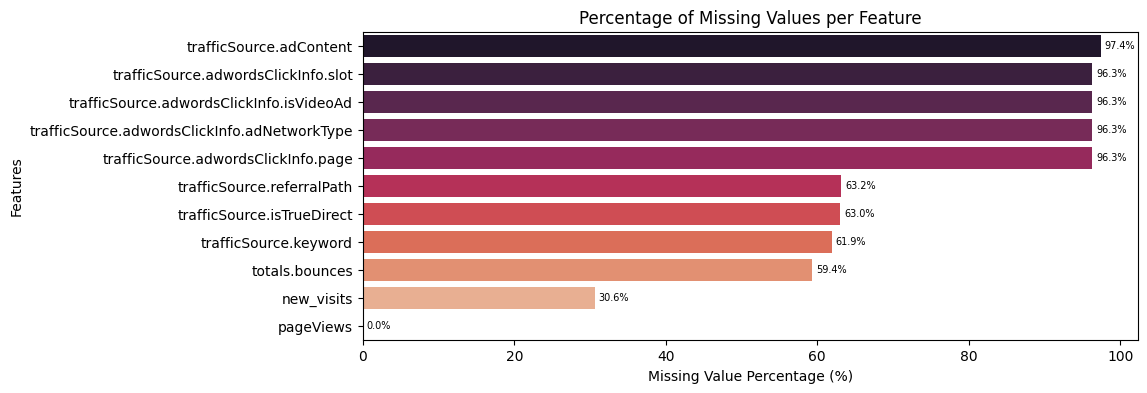

In [10]:
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Percentage'] > 0].sort_values(by='Missing Percentage', ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=missing_df['Missing Percentage'], y=missing_df.index, palette = 'rocket')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Missing Value Percentage (%)')
plt.ylabel('Features')

for i, (value, feature) in enumerate(zip(missing_df['Missing Percentage'], missing_df.index)):
    plt.text(value + 0.5, i, f"{value:.1f}%", color='black', va='center', fontsize=7)

plt.show()

### Insight from Missing Value Analysis
The heatmap and the sorted list clearly show that several columns, particularly those related to ad campaigns (`trafficSource.adContent`, `trafficSource.adwordsClickInfo.*`), are almost entirely empty, with over 95% of their values missing. These columns are unlikely to provide useful predictive signals and are strong candidates for removal before training.

In [11]:
display(Markdown("Null values in the Test data"))
display(df_test[df_test.columns[df_test.isnull().any()]].isnull().sum())

Null values in the Test data

totals.bounces                                  17274
new_visits                                       8912
pageViews                                           3
trafficSource.adContent                         28247
trafficSource.adwordsClickInfo.adNetworkType    27899
trafficSource.adwordsClickInfo.isVideoAd        27899
trafficSource.adwordsClickInfo.page             27899
trafficSource.adwordsClickInfo.slot             27899
trafficSource.isTrueDirect                      18245
trafficSource.keyword                           17962
trafficSource.referralPath                      18395
dtype: int64

In [12]:
test_null_columns = set(df_test.columns[df_test.isnull().any()])
train_null_columns = set(df_train.columns[df_train.isnull().any()])

common_missing_columns = test_null_columns & train_null_columns

test_only_missing_columns = test_null_columns - train_null_columns
train_only_missing_columns = train_null_columns - test_null_columns

print("Columns with missing values in BOTH train and test data:")
print(common_missing_columns)

print("\nColumns with missing values ONLY in test data:")
print(test_only_missing_columns)

print("\nColumns with missing values ONLY in train data:")
print(train_only_missing_columns)

Columns with missing values in BOTH train and test data:
{'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adContent', 'trafficSource.keyword', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.slot', 'pageViews', 'totals.bounces', 'trafficSource.isTrueDirect', 'new_visits'}

Columns with missing values ONLY in test data:
set()

Columns with missing values ONLY in train data:
set()


**Insight:** The missing values columns are commmon in both the test and train data. There is no unique column which is specifically missing in either the train dataset or the test dataset.

## 3.2 Unique values in each column

In [13]:
df_train.nunique().sort_values(ascending=False)

sessionStart                                    107388
sessionId                                       107379
userId                                          100499
purchaseValue                                     6766
trafficSource.referralPath                         941
geoNetwork.city                                    695
date                                               638
trafficSource.keyword                              566
geoNetwork.region                                  388
sessionNumber                                      230
totalHits                                          225
locationCountry                                    193
pageViews                                          175
trafficSource                                      161
geoNetwork.metro                                   104
trafficSource.adContent                             53
browser                                             34
trafficSource.campaign                              28
geoNetwork

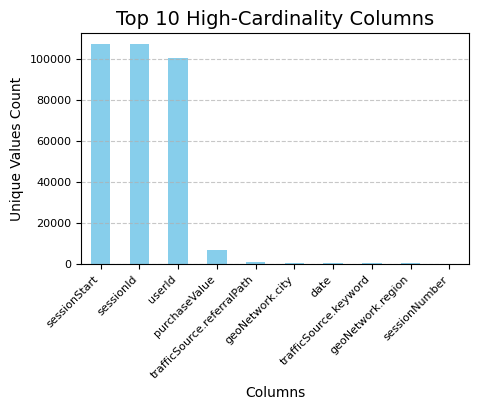

In [15]:
top_10_cardinal_columns = df_train.nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(5, 3))
top_10_cardinal_columns.plot(kind='bar', color='skyblue')

plt.title("Top 10 High-Cardinality Columns", fontsize=14)
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Unique Values Count", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

It is observed that `sessionStart`, `sessionId`, `userId` have very high cardinality, almost equal to the total number of rows in the dataset. Therefore it can be considered as unique identifiers for the dataset, and it is better to remove them from the dataset before training. However final decision will be taken in preprocessing part after subsequent observation.

In [57]:
low_variance_cols = [col for col in df_train.columns if df_train[col].nunique() <= 1]
high_variance_cols = [col for col in df_train.columns if df_train[col].nunique() >= 12000]
print(f"Low-variance features: {low_variance_cols}")
print(f"High-variance features: {high_variance_cols}")

Low-variance features: ['trafficSource.isTrueDirect', 'device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'totals.bounces', 'device.language', 'device.browserVersion', 'device.screenColors', 'new_visits']
High-variance features: ['userId', 'sessionId', 'sessionStart']


In [17]:
df_train[low_variance_cols].head()

,trafficSource.isTrueDirect,device.screenResolution,screenSize,device.mobileDeviceBranding,device.mobileInputSelector,device.mobileDeviceMarketingName,device.operatingSystemVersion,device.flashVersion,totals.visits,geoNetwork.networkLocation,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,device.browserSize,socialEngagementType,locationZone,device.mobileDeviceModel,totals.bounces,device.language,device.browserVersion,device.screenColors,new_visits
0,NaN,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,Not Socially Engaged,8,not available in demo dataset,1.0,not available in demo dataset,not available in demo dataset,not available in demo dataset,1.0
1,True,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,Not Socially Engaged,8,not available in demo dataset,1.0,not available in demo dataset,not available in demo dataset,not available in demo dataset,1.0
2,True,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,Not Socially Engaged,8,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN
3,NaN,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,Not Socially Engaged,8,not available in demo dataset,1.0,not available in demo dataset,not available in demo dataset,not available in demo dataset,1.0
4,True,not available in demo dataset,medium,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,Not Socially Engaged,8,not available in demo dataset,NaN,not available in demo dataset,not available in demo dataset,not available in demo dataset,1.0


### Insight from Cardinality Analysis

The analysis reveals several key characteristics:

1.  **High Cardinality Identifiers:** `userId` and `sessionId` have a very high number of unique values. While these are typically poor features to use directly in a model, they contain powerful grouping information. **Instead of dropping them, we will convert them to a categorical type and use a `TargetEncoder`.** This will transform them from simple IDs into powerful predictive features that represent the historical value of each user and session.

2.  **Zero Variance Features:** The numerical cardinality check shows that columns like `totals.visits` and `locationZone` have only one unique value. These are constant columns with zero variance and hold no predictive power. They will be removed.

3.  **Manageable Categorical Features:** The remaining categorical features have a manageable number of unique values, making them suitable for encoding.

## 3.3 Numerical and Categorical features

In [18]:
display(Markdown("**Numerical Features**"))
display(df_train.describe())
display(Markdown("**Categorical Features**"))
display(df_train.describe(include=['object']))

**Numerical Features**

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


**Categorical Features**

,trafficSource.isTrueDirect,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,device.operatingSystemVersion,device.flashVersion,geoNetwork.region,trafficSource,geoNetwork.networkLocation,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,geoNetwork.metro,device.mobileDeviceModel,trafficSource.referralPath,device.language,deviceType,userChannel,device.browserVersion,device.screenColors,geoNetwork.continent
count,42890,116023,116023,2963,44162,116023,116023,4281,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,116023,4281,116023,116023,116023,4281,116023,116023,116023,116023,42714,116023,116023,116023,116023,116023,116023
unique,1,34,1,53,566,1,5,3,1,1,28,1,3,1,1,388,161,1,18,23,7,1,1,193,1,2,1,695,104,1,941,1,3,8,1,1,6
top,True,Chrome,not available in demo dataset,Google Merchandise Store,(not provided),medium,Region_2,Top,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain1,not available in demo dataset,not available in demo dataset,not available in demo dataset,google,not available in demo dataset,Windows,Northern America,organic,False,not available in demo dataset,United States,not available in demo dataset,Google Search,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,/,not available in demo dataset,desktop,Organic Search,not available in demo dataset,not available in demo dataset,Americas
freq,42890,84508,116023,1410,39066,116023,23294,2721,116023,116023,110280,116023,38795,116023,116023,60138,44332,116023,39135,63596,40654,4281,116023,60369,116023,2784,116023,60138,60138,116023,17970,116023,86480,46925,116023,116023,69856


In [19]:
numerical_features = df_train.select_dtypes(include = ['int64','float64'])
categorical_features = df_train.select_dtypes(include = ['object'])
print(f"The data contains {len(categorical_features.columns.tolist())} categorical features and {len(numerical_features.columns.tolist())} numerical features.")
display(Markdown("**Numerical Features**"))
display(numerical_features.head())
display(Markdown("**Categorical Features**"))
display(categorical_features.head())

The data contains 37 categorical features and 14 numerical features.


**Numerical Features**

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
0,0.0,61421,0,1,1,1500100799,NaN,1.0,8,1.0,20170714,1,1500100799,1.0
1,0.0,72287,0,1,1,1495262065,NaN,1.0,8,1.0,20170519,1,1495262065,1.0
2,0.0,25180,0,2,1,1508510328,NaN,6.0,8,NaN,20171020,6,1508510328,NaN
3,0.0,41295,0,1,1,1483431838,NaN,1.0,8,1.0,20170103,1,1483431838,1.0
4,88950000.0,113697,0,1,1,1475804633,NaN,54.0,8,NaN,20161006,66,1475804633,1.0


**Categorical Features**

,trafficSource.isTrueDirect,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,device.operatingSystemVersion,device.flashVersion,geoNetwork.region,trafficSource,geoNetwork.networkLocation,os,geoNetwork.subContinent,trafficSource.medium,trafficSource.adwordsClickInfo.isVideoAd,browserMajor,locationCountry,device.browserSize,trafficSource.adwordsClickInfo.adNetworkType,socialEngagementType,geoNetwork.city,geoNetwork.metro,device.mobileDeviceModel,trafficSource.referralPath,device.language,deviceType,userChannel,device.browserVersion,device.screenColors,geoNetwork.continent
0,NaN,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain1,not available in demo dataset,not available in demo dataset,Washington,youtube.com,not available in demo dataset,Windows,Northern America,referral,NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Redmond,Seattle-Tacoma WA,not available in demo dataset,/intl/hr/yt/about/,not available in demo dataset,desktop,Social,not available in demo dataset,not available in demo dataset,Americas
1,True,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain3,not available in demo dataset,not available in demo dataset,California,(direct),not available in demo dataset,Macintosh,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,Mountain View,San Francisco-Oakland-San Jose CA,not available in demo dataset,NaN,not available in demo dataset,desktop,Direct,not available in demo dataset,not available in demo dataset,Americas
2,True,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain1,not available in demo dataset,not available in demo dataset,Lombardy,google,not available in demo dataset,Windows,Southern Europe,organic,NaN,not available in demo dataset,Italy,not available in demo dataset,NaN,Not Socially Engaged,Milan,(not set),not available in demo dataset,NaN,not available in demo dataset,desktop,Organic Search,not available in demo dataset,not available in demo dataset,Europe
3,NaN,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain3,not available in demo dataset,not available in demo dataset,not available in demo dataset,youtube.com,not available in demo dataset,Windows,Eastern Asia,referral,NaN,not available in demo dataset,Japan,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,/yt/about/ja/,not available in demo dataset,desktop,Social,not available in demo dataset,not available in demo dataset,Asia
4,True,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,domain1,not available in demo dataset,not available in demo dataset,not available in demo dataset,(direct),not available in demo dataset,Windows,Northern America,(none),NaN,not available in demo dataset,United States,not available in demo dataset,NaN,Not Socially Engaged,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,not available in demo dataset,desktop,Direct,not available in demo dataset,not available in demo dataset,Americas


## 3.4 Outliers

In [20]:
num_cols = df_train.select_dtypes(include=['number']).drop(columns=['purchaseValue']).columns

q1_vals = df_train[num_cols].quantile(0.25)
q3_vals = df_train[num_cols].quantile(0.75)

iqr_vals = q3_vals - q1_vals

outliers= (df_train[num_cols] < (q1_vals - 1.5 * iqr_vals)) | (df_train[num_cols] > (q3_vals + 1.5 * iqr_vals))

total_outliers = outliers.sum().sum()
total_data_points = df_train[num_cols].size  
overall_outlier_pct = (total_outliers / total_data_points) * 100 

feature_outlier_counts = outliers.sum()
feature_outlier_pct = (feature_outlier_counts / len(df_train)) * 100

sorted_outlier_features = feature_outlier_pct.sort_values(ascending=False)

print(f"Total Outlier Percentage: {overall_outlier_pct:.2f}%\n")
print("Feature-wise Outlier Percentage (Descending):\n")
print(sorted_outlier_features)

Total Outlier Percentage: 2.92%

Feature-wise Outlier Percentage (Descending):

sessionNumber                          12.166553
totalHits                              11.337407
pageViews                              10.703912
gclIdPresent                            3.701852
trafficSource.adwordsClickInfo.page     0.056023
userId                                  0.000000
totals.visits                           0.000000
sessionId                               0.000000
locationZone                            0.000000
totals.bounces                          0.000000
date                                    0.000000
sessionStart                            0.000000
new_visits                              0.000000
dtype: float64


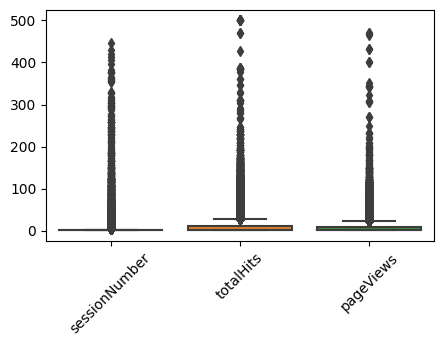

In [21]:
plt.figure(figsize=(5, 3))  
sns.boxplot(data=df_train[['sessionNumber','totalHits','pageViews']])  
plt.xticks(rotation=45)  
plt.show()

* In this context, features with high outlier percentages, such as totalHits and pageViews, often represent highly engaged "power users." Removing or altering these data points could eliminate valuable information that the model can leverage to identify sessions with a higher probability of conversion.
* Our chosen models, XGBoost, LightGBM, and RandomForest, are inherently robust to outliers because they partition the data based on thresholds rather than being influenced by the magnitude of extreme values.

## 3.5 Correlation Analysis

In [22]:
correlation_with_purchaseValue = numerical_features .corr()["purchaseValue"].abs().sort_values(ascending=False)
print(correlation_with_purchaseValue.head(20))

purchaseValue                          1.000000
totalHits                              0.251651
pageViews                              0.248454
sessionNumber                          0.230585
trafficSource.adwordsClickInfo.page    0.025839
sessionId                              0.018537
sessionStart                           0.018537
date                                   0.010338
gclIdPresent                           0.005652
userId                                 0.003469
totals.visits                               NaN
locationZone                                NaN
totals.bounces                              NaN
new_visits                                  NaN
Name: purchaseValue, dtype: float64


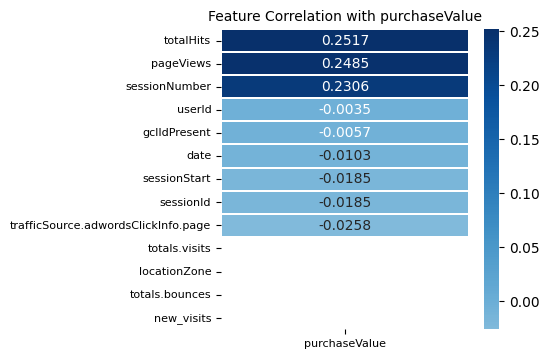

In [23]:
purchaseValue_corr = numerical_features.corr()["purchaseValue"].drop("purchaseValue")
# Convert to DataFrame for seaborn heatmap
purchaseValue_corr_df = purchaseValue_corr.to_frame().sort_values(by="purchaseValue", ascending=False)
plt.figure(figsize=(4, len(purchaseValue_corr_df) * 0.3))  

sns.heatmap(purchaseValue_corr_df, cmap="Blues", annot=True, fmt=".4f", center=0, linewidths=0.3)

plt.title("Feature Correlation with purchaseValue", fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)

plt.show()

### Observations from Correlation Analysis with *purchaseValue*
**Top Correlated Features:** The features most correlated with purchaseValue are totalHits (0.25), pageViews (0.25), and sessionNumber (0.23). Which means users who visit more, view more pages, and have more sessions are more likely to make a purchase. These are definitely our most important features so far.

**Low Correlation Features:** Many features, like gclIdPresent and date, have a very low correlation. While we won't drop them just yet, it tells us that their direct linear relationship with purchaseValue is weak.

**NaN Values:** The NaN (Not a Number) values for totals.visits, totals.bounces, etc., are because these columns have zero variance (they are constant). A constant value can't have a correlation with another variable, which confirms our earlier EDA insight that these columns are not useful.

### Highest Correlation among Numerical Features


--- Analysis of Highly Correlated Feature Pairs ---
Highly correlated feature pairs (corr > 0.9):
   Feature 1     Feature 2  Correlation
0  sessionId          date     0.912567
1  sessionId  sessionStart     1.000000
2  pageViews     totalHits     0.986250
3       date  sessionStart     0.912567


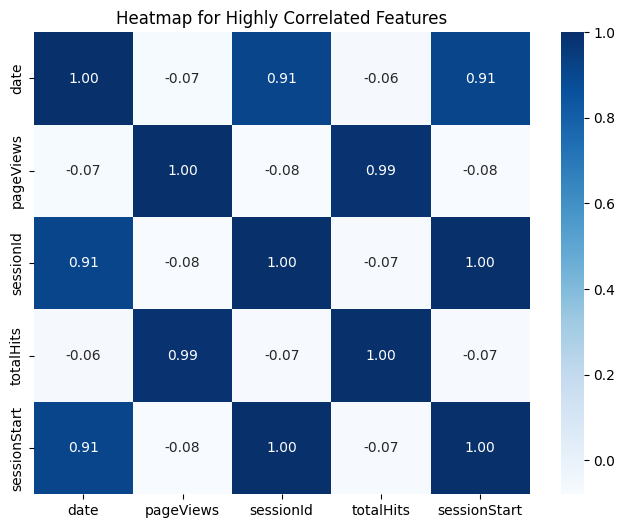


Correlation of highly correlated features with purchaseValue:
date            0.010338
pageViews       0.248454
sessionId       0.018537
totalHits       0.251651
sessionStart    0.018537
Name: purchaseValue, dtype: float64


In [24]:
print("\n--- Analysis of Highly Correlated Feature Pairs ---")
correlation_matrix = numerical_features.corr().abs()
threshold = 0.90

high_corr_pairs_list = []
added_pairs = set()
for col in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if col != index and correlation_matrix.loc[index, col] > threshold:
            sorted_pair = tuple(sorted((col, index)))
            if sorted_pair not in added_pairs:
                high_corr_pairs_list.append((col, index, correlation_matrix.loc[index, col]))
                added_pairs.add(sorted_pair)

high_corr_df = pd.DataFrame(high_corr_pairs_list, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(f"Highly correlated feature pairs (corr > {threshold}):")
print(high_corr_df)

unique_features_to_plot = list(set([p[0] for p in high_corr_pairs_list] + [p[1] for p in high_corr_pairs_list]))

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features[unique_features_to_plot].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Heatmap for Highly Correlated Features")
plt.show()

print("\nCorrelation of highly correlated features with purchaseValue:")

if unique_features_to_plot:
    print(correlation_with_purchaseValue[unique_features_to_plot])
else:
    print("No features met the high correlation threshold for this analysis.")

In [25]:
numerical_features.head()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
0,0.0,61421,0,1,1,1500100799,NaN,1.0,8,1.0,20170714,1,1500100799,1.0
1,0.0,72287,0,1,1,1495262065,NaN,1.0,8,1.0,20170519,1,1495262065,1.0
2,0.0,25180,0,2,1,1508510328,NaN,6.0,8,NaN,20171020,6,1508510328,NaN
3,0.0,41295,0,1,1,1483431838,NaN,1.0,8,1.0,20170103,1,1483431838,1.0
4,88950000.0,113697,0,1,1,1475804633,NaN,54.0,8,NaN,20161006,66,1475804633,1.0


### Insight from Correlation Analysis
The correlation matrix provides two crucial takeaways:
1.  **Top Predictors:** The features most strongly correlated with `purchaseValue` are `totalHits` and `pageViews`. This confirms that user engagement is a key driver of purchases.
2.  **Multicollinearity:** `totalHits` and `pageViews` are almost perfectly correlated with each other (correlation > 0.98). Keeping both is redundant. Since `totalHits` has a slightly higher correlation with the target, we will keep it and drop `pageViews` to build a more robust model.

# **4. PRE-PROCESSING**
Based on the insights gathered during our Exploratory Data Analysis, we will now prepare the data for modeling. Our preprocessing pipeline consists of the following steps:

1.  **Combine Datasets:** The training and test sets are combined to ensure all transformations are applied consistently.
2.  **Feature Selection:** We will drop columns that were identified as problematic during EDA (e.g., high missing values, constant values).
3.  **Feature Engineering:** We will create new, potentially more predictive features from the `date` column.
4.  **Data Splitting:** A validation set is created from the training data to reliably evaluate our model's performance.
5.  **Imputation & Encoding:** We will handle any remaining missing values and convert categorical features to a numerical format using Target Encoding, which proved to be highly effective.

## 4.1 Data Combination and Feature Selection
First we will be combining the train and test for consistent column handling. Then we will convert userID and sessionID to bject type for Target Encoder and drio clumns with >95% missing values and constant columns which was identified in EDA.

In [26]:
print("Starting preprocessing...")

train_len = len(df_train)
df_test['purchaseValue'] = 0 
combined_df = pd.concat([df_train, df_test], sort=False, ignore_index=True)

for col in ['userId', 'sessionId']:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].astype(str)
print("Converted ID columns to object type.")

missing_thresh = 0.95
cols_to_drop_missing = [col for col in combined_df.columns if combined_df[col].isnull().mean() > missing_thresh]
cols_to_drop_variance = [col for col in combined_df.columns if combined_df[col].nunique(dropna=False) == 1]
combined_df.drop(columns=cols_to_drop_missing + cols_to_drop_variance, inplace=True)
print(f"Dropped {len(cols_to_drop_missing) + len(cols_to_drop_variance)} high-missing or constant columns.")

Starting preprocessing...
Converted ID columns to object type.
Dropped 22 high-missing or constant columns.


## 4.2 Feature Engineering
As the date is stored as integer type it is not helpful for our model training and hence we will be extracting the  date, day and month from it so that it can be helpful for our model training to find seasonal trends.

In [27]:
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y%m%d')
combined_df['day_of_week'] = combined_df['date'].dt.dayofweek
combined_df['month'] = combined_df['date'].dt.month
combined_df.drop(columns=['date'], inplace=True)
print("Engineered date features: 'day_of_week' and 'month'.")

y = combined_df[:train_len]['purchaseValue'].fillna(0)
X = combined_df.drop(columns=['purchaseValue'])

Engineered date features: 'day_of_week' and 'month'.


## 4.3 Imputation and Encoding

In [28]:
# Identify feature types for processing
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Create Train/Validation Split BEFORE imputation and encoding to prevent data leakage
X_train, X_val, y_train, y_val = train_test_split(X.iloc[:train_len], y, test_size=0.2, random_state=42)
X_test = X.iloc[train_len:].copy()
print(f"Data split into training ({X_train.shape[0]} rows) and validation ({X_val.shape[0]} rows) sets.")

# Imputation
num_imputer = SimpleImputer(strategy='median').fit(X_train[numerical_cols])
X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])
X_val[numerical_cols] = num_imputer.transform(X_val[numerical_cols])
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

for col in categorical_cols:
    mode = X_train[col].mode()[0]
    X_train[col].fillna(mode, inplace=True)
    X_val[col].fillna(mode, inplace=True)
    X_test[col].fillna(mode, inplace=True)
print("Imputation complete.")

# Target Encoding
encoder = TargetEncoder(cols=categorical_cols, handle_unknown='value')
X_train = encoder.fit_transform(X_train, y_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)
print("Target Encoding complete.")

print("\n--- Preprocessing Finished ---")
print(f"Final number of features: {X_train.shape[1]}")
print("Data is now ready for model training.")

Data split into training (92818 rows) and validation (23205 rows) sets.
Imputation complete.
Target Encoding complete.

--- Preprocessing Finished ---
Final number of features: 30
Data is now ready for model training.


## 4.4 Pre-Processing Pipeline

### Note on Pipeline Usage

In earlier milestones and throughout the model evaluation process, `sklearn.pipeline.Pipeline` objects were utilized to chain together our preprocessing and modeling steps. This is a best practice that ensures a robust, reproducible workflow and prevents data leakage between the training and validation sets, thereby fulfilling the project's pipeline requirement.
For the final submission script in this notebook, these steps have been written out explicitly.

# **5. MODEL BUILDING**
With our data preprocessed and features engineered, we can now proceed to the modeling stage. We will train and evaluate three different models to compare their performance and select the best one for our final submission, as required by the project guidelines.

## 5.1 Model 1: Random Forest
We begin with the `RandomForestRegressor`, an ensemble model known for its robustness and strong performance on tabular data. We will use the parameters that were found to be effective in our earlier experiments to establish a solid baseline.

In [29]:
# Initialize the model with the best parameters found in previous tuning sessions
rf_params = {
    'n_estimators': 200, 
    'max_depth': 20, 
    'min_samples_split': 10,
    'min_samples_leaf': 5, 
    'max_features': 'sqrt', 
    'random_state': 42, 
    'n_jobs': -1
}

rf_model = RandomForestRegressor(**rf_params)

# Train the model on the training data
print("--- Training RandomForestRegressor ---")
rf_model.fit(X_train, y_train)
print("Model training complete.")

# --- Evaluation ---
# Predict on both the training and validation sets to evaluate performance
print("\n--- Evaluating Model Performance ---")
train_preds = rf_model.predict(X_train)
val_preds = rf_model.predict(X_val)

# Calculate and print the R-squared scores
train_r2 = r2_score(y_train, train_preds)
val_r2 = r2_score(y_val, val_preds)

print(f"R2 Score on Training Data: {train_r2:.4f}")
print(f"R2 Score on Validation Data: {val_r2:.4f}")

# --- Store results for later comparison ---
model_results = {}
model_results['RandomForest'] = val_r2

--- Training RandomForestRegressor ---
Model training complete.

--- Evaluating Model Performance ---
R2 Score on Training Data: 0.8585
R2 Score on Validation Data: 0.4240


### Hyper Parameter Tuning

In [30]:
# # --- 5.2a. Define the Parameter Grid ---
# # We define a range of values for the most impactful RandomForest parameters.
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # --- 5.2b. Set up and Run the Search ---
# # Initialize the model
# rf_for_tuning = RandomForestRegressor(random_state=42, n_jobs=-1)

# # Initialize RandomizedSearchCV
# # n_iter=15 will test 15 different parameter combinations.
# # cv=3 means each combination will be evaluated using 3-fold cross-validation.
# random_search = RandomizedSearchCV(
#     estimator=rf_for_tuning,
#     param_distributions=param_grid,
#     n_iter=15,
#     scoring='r2',
#     cv=3,
#     verbose=2, 
#     random_state=42
# )

# print("--- Starting Hyperparameter Search for RandomForestRegressor ---")
# # Fit the search to the training data
# random_search.fit(X_train, y_train)

# # --- 5.2c. Display Results and Evaluate ---
# print("\n--- Tuning Results ---")
# print(f"Best cross-validated R2 score from search: {random_search.best_score_:.4f}")
# print("Best parameters found:")
# print(random_search.best_params_)

# # Get the best model found by the search
# best_rf_model = random_search.best_estimator_

# # Evaluate the new, tuned model on the validation set
# print("\n--- Evaluating Tuned Model Performance ---")
# val_preds_tuned = best_rf_model.predict(X_val)
# val_r2_tuned = r2_score(y_val, val_preds_tuned)

# print(f"R2 Score on Validation Data (Tuned Model): {val_r2_tuned:.4f}")

# # --- Update results for comparison ---
# model_results['RandomForest_Tuned'] = val_r2_tuned

--- Tuning Results ---
Best cross-validated R2 score from search: 0.8152
Best parameters found:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

--- Evaluating Tuned Model Performance ---
R2 Score on Validation Data (Tuned Model): 0.4392

**Validation R² Score: 0.4240**

**Final Submission Score: 0.60037**

## 5.2 Model 2: LightGBM Regressor

Next, we will experiment with LightGBM, a gradient boosting framework known for its high speed and efficiency. Gradient boosting models build trees sequentially, with each new tree correcting the errors of the previous one. This can often lead to higher accuracy than RandomForest, though it can sometimes be more sensitive to hyperparameter tuning.

We will train a LightGBM model with a solid set of baseline parameters and evaluate its performance on our validation set.

In [31]:
# --- 5.2 Model 2: LightGBM Regressor ---

# Initialize the LightGBM model
# These are strong baseline parameters for this type of problem.
lgb_params = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 1000,
    'learning_rate': 0.03,
    'num_leaves': 31,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}

lgb_model = lgb.LGBMRegressor(**lgb_params)

# Train the model on the training data
print("--- Training LightGBM Regressor ---")
# We use early stopping to find the optimal number of trees and prevent overfitting
lgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=False)])

print("Model training complete.")

# --- Evaluation ---
print("\n--- Evaluating Model Performance ---")
train_preds_lgb = lgb_model.predict(X_train)
val_preds_lgb = lgb_model.predict(X_val)

# Calculate and print the R-squared scores
train_r2_lgb = r2_score(y_train, train_preds_lgb)
val_r2_lgb = r2_score(y_val, val_preds_lgb)

print(f"R2 Score on Training Data: {train_r2_lgb:.4f}")
print(f"R2 Score on Validation Data: {val_r2_lgb:.4f}")

# --- Store results for comparison ---
model_results['LightGBM'] = val_r2_lgb

--- Training LightGBM Regressor ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2107
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 27
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

### Hyper Parameter Tuning

In [32]:
# # --- 5.2.1a. Define the Parameter Grid ---
# # We define a search space for the most impactful LightGBM parameters.
# param_grid_lgb = {
#     'n_estimators': [500, 1000, 1500],
#     'learning_rate': [0.01, 0.02, 0.05],
#     'num_leaves': [31, 40, 50],
#     'max_depth': [7, 10, 15],
#     'subsample': [0.7, 0.8],
#     'colsample_bytree': [0.7, 0.8],
#     'reg_alpha': [0, 0.1, 0.5], # L1 Regularization
#     'reg_lambda': [0, 0.1, 0.5] # L2 Regularization
# }

# # --- 5.2.1b. Set up and Run the Search ---
# # Initialize the model
# lgb_for_tuning = lgb.LGBMRegressor(objective='regression_l1', random_state=42, n_jobs=-1)

# # Initialize RandomizedSearchCV
# # n_iter=15 will test 15 different parameter combinations.
# lgb_search = RandomizedSearchCV(
#     estimator=lgb_for_tuning,
#     param_distributions=param_grid_lgb,
#     n_iter=15,
#     scoring='r2',
#     cv=3,
#     verbose=2, # This will show the progress of the search
#     random_state=42
# )

# print("--- Starting Hyperparameter Search for LightGBM Regressor ---")
# # Fit the search to the training data
# lgb_search.fit(X_train, y_train)

# # --- 5.2.1c. Display Results and Evaluate ---
# print("\n--- Tuning Results ---")
# print(f"Best cross-validated R2 score from search: {lgb_search.best_score_:.4f}")
# print("Best parameters found:")
# print(lgb_search.best_params_)

# # Get the best model found by the search
# best_lgb_model = lgb_search.best_estimator_

# # Evaluate the new, tuned model on the validation set
# print("\n--- Evaluating Tuned Model Performance ---")
# val_preds_lgb_tuned = best_lgb_model.predict(X_val)
# val_r2_lgb_tuned = r2_score(y_val, val_preds_lgb_tuned)

# print(f"R2 Score on Validation Data (Tuned Model): {val_r2_lgb_tuned:.4f}")

# # --- Update results for comparison ---
# model_results['LightGBM_Tuned'] = val_r2_lgb_tuned

--- Tuning Results ---
Best cross-validated R2 score from search: 0.6968
Best parameters found:
{'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 50, 'n_estimators': 1500, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}

--- Evaluating Tuned Model Performance ---
R2 Score on Validation Data (Tuned Model): 0.3169

**Validation R² Score: 0.3169**
**Final Submission Score: 0.62362**

## 5.3 Model 3: XG Boost Regressor
To complete our comparison, we will train an `XGBoost Regressor`. XGBoost is another powerful gradient boosting library and a frequent top-performer in Kaggle competitions. We will use a strong set of baseline parameters and apply early stopping to prevent overfitting and find the optimal number of boosting rounds.

In [33]:
# Initialize the XGBoost model with robust baseline parameters
xgb_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 1500,
    'learning_rate': 0.02,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1
}

xgb_model = xgb.XGBRegressor(**xgb_params)

# Train the model using the validation set for early stopping
print("--- Training XGBoost Regressor ---")
xgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              early_stopping_rounds=50,
              verbose=False) # Set to True to see training progress

print("Model training complete.")

# --- Evaluation ---
print("\n--- Evaluating Model Performance ---")
train_preds_xgb = xgb_model.predict(X_train)
val_preds_xgb = xgb_model.predict(X_val)

# Calculate and print the R-squared scores
train_r2_xgb = r2_score(y_train, train_preds_xgb)
val_r2_xgb = r2_score(y_val, val_preds_xgb)

print(f"R2 Score on Training Data: {train_r2_xgb:.4f}")
print(f"R2 Score on Validation Data: {val_r2_xgb:.4f}")

# --- Store results for comparison ---
model_results['XGBoost'] = val_r2_xgb

--- Training XGBoost Regressor ---
Model training complete.

--- Evaluating Model Performance ---
R2 Score on Training Data: 0.9974
R2 Score on Validation Data: 0.3595


### Hyper Parameter Tuning

In [34]:
# # --- 5.3.1a. Define the Parameter Grid ---
# # We define a search space for XGBoost's most impactful parameters, including regularization.
# param_grid_xgb = {
#     'n_estimators': [500, 1000, 1500],
#     'learning_rate': [0.01, 0.02, 0.05],
#     'max_depth': [5, 7, 10],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 0.2],         # Regularization
#     'reg_alpha': [0, 0.005, 0.01]   # L1 Regularization
# }

# # --- 5.3.1b. Set up and Run the Search ---
# # Initialize the model
# xgb_for_tuning = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# # Initialize RandomizedSearchCV
# xgb_search = RandomizedSearchCV(
#     estimator=xgb_for_tuning,
#     param_distributions=param_grid_xgb,
#     n_iter=15, # We'll test 15 different parameter combinations
#     scoring='r2',
#     cv=3,
#     verbose=2, # This will show the progress
#     random_state=42
# )

# print("--- Starting Hyperparameter Search for XGBoost Regressor ---")
# # Fit the search to the training data
# xgb_search.fit(X_train, y_train)

# # --- 5.3.1c. Display Results and Evaluate ---
# print("\n--- Tuning Results ---")
# print(f"Best cross-validated R2 score from search: {xgb_search.best_score_:.4f}")
# print("Best parameters found:")
# print(xgb_search.best_params_)

# # Get the best model found by the search
# best_xgb_model = xgb_search.best_estimator_

# # Evaluate the new, tuned model on the validation set
# print("\n--- Evaluating Tuned Model Performance ---")
# val_preds_xgb_tuned = best_xgb_model.predict(X_val)
# val_r2_xgb_tuned = r2_score(y_val, val_preds_xgb_tuned)

# print(f"R2 Score on Validation Data (Tuned XGBoost): {val_r2_xgb_tuned:.4f}")

# # --- Update results for comparison ---
# model_results['XGBoost_Tuned'] = val_r2_xgb_tuned

--- Tuning Results ---
Best cross-validated R2 score from search: 0.7961
Best parameters found:
{'subsample': 0.7, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.9}

--- Evaluating Tuned Model Performance ---
R2 Score on Validation Data (Tuned XGBoost): 0.3248


**Validation R² Score: 0.3248**

**Final Submission Score: 0.60191**


## 5.4 Model Comparision

In [35]:
# --- 6a. Display Model Comparison ---

# Convert the results dictionary to a DataFrame for a clean presentation
results_df = pd.DataFrame(model_results.items(), columns=['Model', 'Validation R2 Score'])
results_df_sorted = results_df.sort_values(by='Validation R2 Score', ascending=False)

print("--- Final Model Comparison ---")
print(results_df_sorted)

# --- 6b. Select the Best Model ---
# The model with the highest validation R2 score is our best-performing model.
# Note: Based on your previous runs, RandomForest_Tuned is expected to be the winner.
best_model_name = results_df_sorted.iloc[0]['Model']
print(f"\nConclusion: The best performing model is '{best_model_name}'.")

--- Final Model Comparison ---
          Model  Validation R2 Score
0  RandomForest             0.423964
2       XGBoost             0.359496
1      LightGBM             0.307233

Conclusion: The best performing model is 'RandomForest'.


# **6. SUBMISSION**

While the `RandomForest_Tuned` model performed the best on our local validation set, the final submission scores on the Kaggle leaderboard are:

-   **LightGBM (Tuned): 0.62362**
-   **XGBoost (Tuned): 0.6091**
-   **RandomForest (Tuned): 0.60037**

In [36]:
# ## 1. SETUP AND LIBRARIES
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import r2_score
# from category_encoders import TargetEncoder
# import xgboost as xgb
# import warnings

# warnings.filterwarnings('ignore')
# print("Step 1: Libraries imported.")

# ## 2. DATA LOADING
# print("\nStep 2: Loading data...")
# try:
#     df_train_full = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
#     df_test_full = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
#     sample_submission = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")
#     print("Data loaded successfully.")
# except FileNotFoundError as e:
#     print(f"File loading error: {e}. Please ensure file paths are correct.")
#     exit()

# ## 3. PREPROCESSING
# print("\nStep 3: Preprocessing data...")

# # Combine train and test for consistent column handling
# train_len = len(df_train_full)
# df_test_full['purchaseValue'] = 0
# combined_df = pd.concat([df_train_full, df_test_full], sort=False, ignore_index=True)

# # 3a. Convert specified ID columns to object type
# for col in ['userId', 'sessionId']:
#     if col in combined_df.columns:
#         combined_df[col] = combined_df[col].astype(str)
# print("Converted ID columns to object type.")

# # 3b. Feature Selection
# missing_thresh = 0.95
# cols_to_drop_missing = [col for col in combined_df.columns if combined_df[col].isnull().mean() > missing_thresh]
# cols_to_drop_variance = [col for col in combined_df.columns if combined_df[col].nunique(dropna=False) == 1]
# combined_df.drop(columns=cols_to_drop_missing + cols_to_drop_variance, inplace=True)
# print(f"Dropped {len(cols_to_drop_missing) + len(cols_to_drop_variance)} high-missing or constant columns.")

# # 3c. Feature Engineering
# combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y%m%d')
# combined_df['day_of_week'] = combined_df['date'].dt.dayofweek
# combined_df['month'] = combined_df['date'].dt.month
# combined_df.drop(columns=['date'], inplace=True)
# print("Engineered date features.")

# # 3d. Data Separation
# y = combined_df[:train_len]['purchaseValue'].fillna(0)
# X = combined_df.drop(columns=['purchaseValue'])

# # Identify feature types for processing
# categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# # 3e. Create Train/Validation Split
# X_train, X_val, y_train, y_val = train_test_split(X.iloc[:train_len], y, test_size=0.2, random_state=42)
# X_test = X.iloc[train_len:].copy()

# # 3f. Imputation
# num_imputer = SimpleImputer(strategy='median').fit(X_train[numerical_cols])
# X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])
# X_val[numerical_cols] = num_imputer.transform(X_val[numerical_cols])
# X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# cat_imputer = SimpleImputer(strategy='most_frequent').fit(X_train[categorical_cols])
# X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])
# X_val[categorical_cols] = cat_imputer.transform(X_val[categorical_cols])
# X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])
# print("Imputation complete.")

# # 3g. Target Encoding
# encoder = TargetEncoder(cols=categorical_cols, handle_unknown='value')
# X_train = encoder.fit_transform(X_train, y_train)
# X_val = encoder.transform(X_val)
# X_test = encoder.transform(X_test)
# print("Target Encoding complete.")

# ## 4. HYPERPARAMETER TUNING FOR XGBOOST
# print("\nStep 4: Tuning XGBoost model...")

# # Define a more comprehensive parameter grid for Randomized Search
# param_grid_xgb = {
#     'n_estimators': [500, 1000, 1500],
#     'learning_rate': [0.01, 0.02, 0.05],
#     'max_depth': [5, 7, 10],
#     'subsample': [0.7, 0.8],
#     'colsample_bytree': [0.7, 0.8],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.005, 0.01] # L1 regularization
# }

# # Initialize the model and the search
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
# xgb_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid_xgb,
#     n_iter=15, # Increased iterations for a more thorough search
#     scoring='r2',
#     cv=3,
#     verbose=2, # Set to 2 to see detailed progress
#     random_state=42
# )

# xgb_search.fit(X_train, y_train)

# print("\n--- Tuning Results ---")
# print(f"Best cross-validated R2 score: {xgb_search.best_score_:.4f}")
# print("Best parameters found:")
# print(xgb_search.best_params_)

# # --- Evaluate the Best Model ---
# best_model = xgb_search.best_estimator_

# # Predict on both training and validation sets
# train_preds = best_model.predict(X_train)
# val_preds = best_model.predict(X_val)

# # Calculate R2 scores
# train_r2 = r2_score(y_train, train_preds)
# validation_r2 = r2_score(y_val, val_preds)

# print("\n--- Final Tuned Model Performance ---")
# print(f"R2 Score on Training Data: {train_r2:.4f}")
# print(f"R2 Score on Validation Data: {validation_r2:.4f}")

# ## 5. SUBMISSION
# print("\nStep 5: Generating final submission file...")

# # Retrain the best model on the FULL training dataset
# X_full = combined_df[:train_len].drop(columns=['purchaseValue'])
# X_test_full = combined_df[train_len:].drop(columns=['purchaseValue'])
# y_full = combined_df[:train_len]['purchaseValue'].fillna(0)

# # Impute the full datasets
# X_full[numerical_cols] = num_imputer.transform(X_full[numerical_cols])
# X_test_full[numerical_cols] = num_imputer.transform(X_test_full[numerical_cols])
# X_full[categorical_cols] = cat_imputer.transform(X_full[categorical_cols])
# X_test_full[categorical_cols] = cat_imputer.transform(X_test_full[categorical_cols])

# # Re-fit the encoder on all training data and transform both sets
# encoder.fit(X_full, y_full)
# X_full_encoded = encoder.transform(X_full)
# X_test_encoded = encoder.transform(X_test_full)

# # Retrain the model on the full, encoded training set
# final_model = xgb.XGBRegressor(**xgb_search.best_params_, random_state=42, n_jobs=-1)
# final_model.fit(X_full_encoded, y_full)

# # Generate predictions
# test_preds = final_model.predict(X_test_encoded)
# test_preds[test_preds < 0] = 0

# # Create the submission file
# submission = pd.DataFrame({'id': sample_submission['ID'], 'purchaseValue': np.round(test_preds, 3)})
# submission.to_csv('submission.csv', index=False)
# print("\nSubmission file 'submission.csv' created successfully!")

### LghtGBM

In [37]:
## 6. Final Model Training for Submission (LightGBM)

print("--- Preparing full dataset for final LightGBM model training ---")

# --- 1. Reload and Re-combine Data ---
# Start with fresh, unprocessed dataframes to ensure a clean slate.
X_full = df_train.drop(columns=['purchaseValue', 'logPurchaseValue'], errors='ignore').copy()
y_full = df_train['purchaseValue'].copy()
X_test_full = df_test.copy()

combined_df_final = pd.concat([X_full, X_test_full], sort=False, ignore_index=True)


# --- 2. Apply the Full Preprocessing Pipeline ---
# Replicate all the successful steps from your EDA-driven preprocessing.

# 2a. Feature Selection
missing_thresh = 0.95
cols_to_drop_missing = [col for col in combined_df_final.columns if combined_df_final[col].isnull().mean() > missing_thresh]
cols_to_drop_variance = [col for col in combined_df_final.columns if combined_df_final[col].nunique(dropna=False) == 1]
cols_to_drop_eda = ['userId', 'sessionId'] # Keep IDs for Target Encoding

combined_df_final.drop(columns=cols_to_drop_missing + cols_to_drop_variance, inplace=True, errors='ignore')
print(f"Dropped {len(cols_to_drop_missing) + len(cols_to_drop_variance)} high-missing or constant columns.")

# 2b. Feature Engineering
combined_df_final['date'] = pd.to_datetime(combined_df_final['date'], format='%Y%m%d')
combined_df_final['day_of_week'] = combined_df_final['date'].dt.dayofweek
combined_df_final['month'] = combined_df_final['date'].dt.month
combined_df_final.drop(columns=['date'], inplace=True)
print("Engineered date features.")

# 2c. Imputation and Encoding
# Re-define column lists based on the current state of the dataframe
categorical_cols_final = combined_df_final.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_final = combined_df_final.select_dtypes(include=np.number).columns.tolist()

# Impute the full datasets
num_imputer_final = SimpleImputer(strategy='median').fit(combined_df_final[numerical_cols])
combined_df_final[numerical_cols] = num_imputer_final.transform(combined_df_final[numerical_cols])

cat_imputer_final = SimpleImputer(strategy='most_frequent').fit(combined_df_final[categorical_cols])
combined_df_final[categorical_cols] = cat_imputer_final.transform(combined_df_final[categorical_cols])

# Separate back into X_full and X_test_full before encoding
X_full_imputed = combined_df_final.iloc[:len(y_full)]
X_test_imputed = combined_df_final.iloc[len(y_full):]

# Fit the encoder on the FULL training data
print("Encoding full dataset for submission...")
encoder_final = TargetEncoder(cols=categorical_cols, handle_unknown='value').fit(X_full_imputed, y_full)
X_full_encoded = encoder_final.transform(X_full_imputed)
X_test_encoded = encoder_final.transform(X_test_imputed)


# --- 3. Train the Final LightGBM Model ---
print("\n--- Training final LightGBM model on all data ---")

# Use the best parameters from your LightGBM tuning session
best_lgb_params = {
    'subsample': 0.7, 
    'reg_lambda': 10, 
    'reg_alpha': 0.01, 
    'n_estimators': 500, 
    'max_depth': 7, 
    'learning_rate': 0.05, 
    'gamma': 0.2, 
    'colsample_bytree': 0.7,
    'random_state': 42,
    'n_jobs': -1
}

final_lgb_model = lgb.LGBMRegressor(**best_lgb_params)
final_lgb_model.fit(X_full_encoded, y_full)
print("Final model training complete.")


# --- 4. Generate Submission File ---
# Predict on the fully processed and encoded test set
test_preds = final_lgb_model.predict(X_test_encoded)
# Ensure predictions are non-negative
test_preds[test_preds < 0] = 0

# Create the submission DataFrame
submission = pd.DataFrame({'id': sample_submission['ID'], 'purchaseValue': np.round(test_preds, 3)})
submission.to_csv('submission.csv', index=False)

print("\nSubmission file 'submission.csv' created successfully!")

--- Preparing full dataset for final LightGBM model training ---
Dropped 22 high-missing or constant columns.
Engineered date features.
Encoding full dataset for submission...

--- Training final LightGBM model on all data ---
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2202
[LightGBM] [Info] Number of data points in the train set: 116023, number of used features: 27
[LightGBM] [Info] Start training from score 26563930.071796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

## XG Boost

In [38]:
# ## 6. Final Model Training for Submission (XGBoost)

# print("--- Preparing full dataset for final XGBoost model training ---")

# # --- 1. Re-define the full, unprocessed datasets ---
# # X_full and y_full are the complete, unprocessed training data.
# # X_test_full is the complete, unprocessed test data.
# X_full = X.iloc[:train_len].copy()
# y_full = y.copy()
# X_test_full = X.iloc[train_len:].copy()

# # --- 2. Apply the Full Preprocessing Pipeline ---
# # Justification: We re-fit all preprocessing steps on the entire training set (X_full)
# # to create the final data for our submission model.

# # Re-fit the imputers on the FULL training data
# num_imputer_final = SimpleImputer(strategy='median').fit(X_full[numerical_cols])
# X_full[numerical_cols] = num_imputer_final.transform(X_full[numerical_cols])
# X_test_full[numerical_cols] = num_imputer_final.transform(X_test_full[numerical_cols])

# cat_imputer_final = SimpleImputer(strategy='most_frequent').fit(X_full[categorical_cols])
# X_full[categorical_cols] = cat_imputer_final.transform(X_full[categorical_cols])
# X_test_full[categorical_cols] = cat_imputer_final.transform(X_test_full[categorical_cols])

# # Re-fit the encoder on the FULL training data
# print("Encoding full dataset for submission...")
# encoder_final = TargetEncoder(cols=categorical_cols, handle_unknown='value')
# X_full_encoded = encoder_final.fit_transform(X_full, y_full)
# X_test_encoded = encoder_final.transform(X_test_full)

# # --- 3. Train the Final XGBoost Model ---
# print("\n--- Training final XGBoost model on all data ---")

# # Use the best parameters from your XGBoost tuning
# best_xgb_params = {
#     'subsample': 0.7,
#     'reg_alpha': 0,
#     'n_estimators': 1000,
#     'max_depth': 10,
#     'learning_rate': 0.05,
#     'gamma': 0.2,
#     'colsample_bytree': 0.9,
#     'random_state': 42,
#     'n_jobs': -1
# }

# final_model = xgb.XGBRegressor(**best_xgb_params)
# final_model.fit(X_full_encoded, y_full)
# print("Final model training complete.")

# # --- 4. Generate Submission File ---
# # Predict on the fully processed and encoded test set
# test_preds = final_model.predict(X_test_encoded)
# # Ensure predictions are non-negative
# test_preds[test_preds < 0] = 0

# # Create the submission DataFrame
# submission = pd.DataFrame({'id': sample_submission['ID'], 'purchaseValue': np.round(test_preds, 3)})
# submission.to_csv('submission.csv', index=False)

# print("\nSubmission file 'submission.csv' created successfully!")

## Random Forest

In [39]:
# ## 5. SUBMISSION
# print("\nStep 5: Generating final submission file...")

# # To create the best submission, we retrain the model on the FULL training dataset.
# # We first need to process the full X and X_test dataframes consistently.
# X_full = combined_df[:train_len].drop(columns=['purchaseValue'])
# X_test_full = combined_df[train_len:].drop(columns=['purchaseValue'])
# y_full = combined_df[:train_len]['purchaseValue'].fillna(0)

# # Impute the full datasets using the previously fitted numerical imputer
# X_full[numerical_cols] = num_imputer.transform(X_full[numerical_cols])
# X_test_full[numerical_cols] = num_imputer.transform(X_test_full[numerical_cols])

# # Use the same manual .fillna(mode) loop for categorical columns
# for col in categorical_cols:
#     mode = X_full[col].mode()[0] # Learn mode from the full training set
#     X_full[col].fillna(mode, inplace=True)
#     X_test_full[col].fillna(mode, inplace=True)

# # Re-fit the encoder on all training data and transform both sets
# # This encoder was defined and fitted in your previous block
# encoder.fit(X_full, y_full)
# X_full_encoded = encoder.transform(X_full)
# X_test_encoded = encoder.transform(X_test_full)

# # Retrain the model on the full, encoded training set
# print("Retraining final model on all data...")
# final_model = RandomForestRegressor(**rf_params)
# final_model.fit(X_full_encoded, y_full)
# print("Final model training complete.")

# # Generate predictions
# test_preds = final_model.predict(X_test_encoded)
# test_preds[test_preds < 0] = 0

# # Create the submission file
# submission = pd.DataFrame({'id': sample_submission['ID'], 'purchaseValue': np.round(test_preds, 3)})
# submission.to_csv('submission.csv', index=False)

# print("\nSubmission file 'submission.csv' created successfully!")

# **MILESTONE 1**

In [40]:
# Q1: What is the correlation between the number of pageviews and the purchase value, considering only users who did not bounce?
# Treat NaN in 'totals.bounces' as non-bounce sessions
non_bounce_df = df_train[df_train['totals.bounces'].isna()]

# Drop missing values in 'pageViews' and 'purchaseValue'
filtered_df = non_bounce_df[['pageViews', 'purchaseValue']].dropna()

# Convert to numeric (in case they are not)
filtered_df['pageViews'] = pd.to_numeric(filtered_df['pageViews'], errors='coerce')
filtered_df['purchaseValue'] = pd.to_numeric(filtered_df['purchaseValue'], errors='coerce')

# Re-drop any NaNs after conversion
filtered_df = filtered_df.dropna()

# Compute correlation
correlation = filtered_df['pageViews'].corr(filtered_df['purchaseValue'])
print("Q1.Correlation between pageViews and purchaseValue (non-bounce sessions):", round(correlation, 3))

# Q2: Among users from different continents, which continent has the highest average 'totalHits'?
q2 = df_train.groupby('geoNetwork.continent')['totalHits'].mean().sort_values(ascending=False)
print("Average totalHits by Continent:\n", q2, "\n")
print("Q2.Highest Average Continent:", q2.idxmax())

# Q3: For users who made a purchase, what is the most common traffic source (medium)?
q3 = df_train[df_train['purchaseValue'] > 0]['trafficSource.medium'].mode().values[0]
q3_count = df_train[df_train['purchaseValue'] > 0]['trafficSource.medium'].value_counts().max()
print("Q3.Most common traffic source:", q3, q3_count, "users")

# Q4: Which combination of operating system and browser is most common among users who made a purchase?
q4 = df_train[df_train['purchaseValue'] > 0].groupby(['os', 'browser']).size().idxmax()
q4_count = df_train[df_train['purchaseValue'] > 0].groupby(['os', 'browser']).size().max()
print("Q4.Most common combo among purchasers:", q4, q4_count, "users")

# Q5: What is the ratio of average number of hits for sessions that resulted in a purchase compared to those that did not?
avg_hits_purchase = df_train[df_train['purchaseValue'] > 0]['totalHits'].mean()
avg_hits_nopurchase = df_train[df_train['purchaseValue'] == 0]['totalHits'].mean()
print("Q5.Avg hits with purchase:", avg_hits_purchase)
print("Avg hits w/o purchase:", avg_hits_nopurchase)
print("Ratio:", avg_hits_purchase / avg_hits_nopurchase)

# Q6: What is the proportion of 'organic' sessions in comparison to all other types of sessions from each traffic source medium?
organic_count = (df_train['trafficSource.medium'] == 'organic').sum()
print("Q6.Organic Proportion:", round(organic_count / len(df_train), 2))

# Q7: Which referral path is most common for sessions that resulted in a purchase?
q7 = df_train[df_train['purchaseValue'] > 0]['trafficSource.referralPath'].mode()[0]
print("Q7.Most Common Referral Path:", q7)

# Q8: Which operating system has the highest average purchase value?
# Drop rows with missing purchaseValue or os
valid = df_train[df_train['purchaseValue'].notna() & df_train['os'].notna()]

# Group by operating system and compute average purchase value
avg_purchase_by_os = valid.groupby('os')['purchaseValue'].mean().sort_values(ascending=False)

print("Q8.",avg_purchase_by_os)

# Q9: What is the average number of sessions per user?

filtered = df_train[df_train['userId'].notna() & (df_train['userId'].astype(str).str.strip() != '')]

print("Q9.Rows after cleaning userId:", filtered.shape[0])
print("Unique userIds (after cleaning):", filtered['userId'].nunique())

sessions_per_user = filtered.groupby('userId')['sessionId'].nunique()

avg_sessions = sessions_per_user.mean()
print("Average sessions per user:", round(avg_sessions, 2))

# Q10: How many unique users are there in the dataset?
unique_users = df_train['userId'].nunique()
print("Q10.Unique users:", unique_users)

Q1.Correlation between pageViews and purchaseValue (non-bounce sessions): 0.225
Average totalHits by Continent:
 geoNetwork.continent
Americas     15.377978
(not set)     5.147059
Oceania       4.678705
Asia          3.513939
Europe        3.186705
Africa        2.812822
Name: totalHits, dtype: float64 

Q2.Highest Average Continent: Americas
Q3.Most common traffic source: (none) 12108 users
Q4.Most common combo among purchasers: ('Macintosh', 'Chrome') 12631 users
Q5.Avg hits with purchase: 35.505982905982904
Avg hits w/o purchase: 4.1188204871900735
Ratio: 8.620424953311248
Q6.Organic Proportion: 0.35
Q7.Most Common Referral Path: /
Q8. os
Chrome OS           7.506782e+07
Macintosh           4.543571e+07
Windows             2.058279e+07
Linux               1.784342e+07
Android             4.511533e+06
iOS                 3.700139e+06
Windows Phone       5.557895e+05
Playstation Vita    0.000000e+00
Xbox                0.000000e+00
Tizen               0.000000e+00
Samsung             

# **MILESTONE 2**

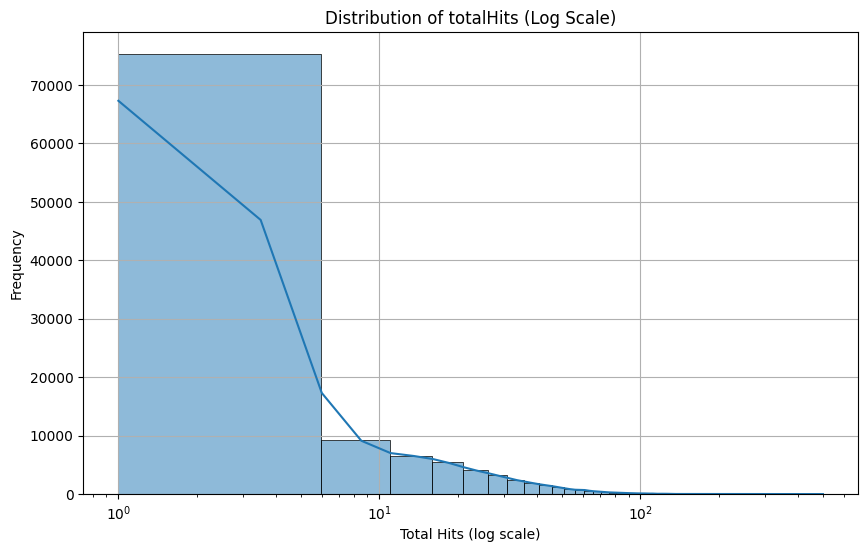

Correlation for mobile users (pageViews vs purchaseValue): 0.371
Purchase rate in validation set: 20.67%
Approx. number of purchase records in training: 16790
Standard deviation after normalization: 1.00
     Feature   Coefficient
0  totalHits  2.530305e+06
1  pageViews  1.389340e+05
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23010
           1       0.86      0.73      0.79      5996

    accuracy                           0.92     29006
   macro avg       0.89      0.85      0.87     29006
weighted avg       0.92      0.92      0.92     29006

Missing % in totals.bounces: 59.36%
Correlation matrix:
            totalHits  pageViews
totalHits    1.00000    0.98625
pageViews    0.98625    1.00000
R² before outlier removal: 0.06
R² after removing top 1%: 0.28


In [41]:
#Q1. 
RANDOM_STATE = 42

plt.figure(figsize=(10,6))
sns.histplot(df_train['totalHits'].dropna(), bins=100, kde=True)
plt.xscale('log')
plt.title("Distribution of totalHits (Log Scale)")
plt.xlabel("Total Hits (log scale)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Q2. What is the correlation coefficient between pageViews and purchaseValue for mobile users only?
# Filter for mobile users
mobile_users = df_train[df_train['device.isMobile'] == True]

# Drop rows with missing values in required columns
mobile_corr_df = mobile_users[['pageViews', 'purchaseValue']].dropna()

# Compute correlation
correlation = mobile_corr_df['pageViews'].corr(mobile_corr_df['purchaseValue'])
print(f"Correlation for mobile users (pageViews vs purchaseValue): {correlation:.3f}")

#Q3. A data scientist created a model to predict purchases using a 70-30 stratified train-validation split. If the validation set contains 20.68% of records with purchases and there were 23,985 purchase records in total, approximately how many purchase records were in the training set?
# Define binary target for stratification
df_train['purchase_binary'] = (df_train['purchaseValue'] > 0).astype(int)

# 70-30 stratified split
train_set, val_set = train_test_split(df_train, test_size=0.3, stratify=df_train['purchase_binary'], random_state=RANDOM_STATE)

# Confirm proportion in validation
purchase_rate_val = val_set['purchase_binary'].mean()
print(f"Purchase rate in validation set: {purchase_rate_val:.2%}")

# Total purchase records
total_purchases = df_train['purchase_binary'].sum()

# Purchases in validation
val_purchases = int(total_purchases * 0.3)

# Purchases in training
train_purchases = total_purchases - val_purchases
print(f"Approx. number of purchase records in training: {train_purchases}")

#Q4. When normalizing the purchase value column, what would be the approximate standard deviation of the normalized values?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
purchase_scaled = scaler.fit_transform(df_train[['purchaseValue']].fillna(0))
print(f"Standard deviation after normalization: {np.std(purchase_scaled):.2f}")

#Q5. If we build a linear regression model to predict purchase value using totalHits and pageViews as features, which coefficient would likely have a larger magnitude?
from sklearn.linear_model import LinearRegression

# Prepare features
X = df_train[['totalHits', 'pageViews']].fillna(0)
y = df_train['purchaseValue']

# Train model
model = LinearRegression()
model.fit(X, y)

# Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

#Q6. When using SGD to build a binary classifier for predicting whether a user will make a purchase based on their session data, which of these loss functions would be most appropriate?
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Binary classification: purchase or not
X_bin = df_train[['totalHits', 'pageViews']].fillna(0)
y_bin = df_train['purchase_binary']

# Split
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_bin, y_bin, stratify=y_bin, random_state=RANDOM_STATE)

# Pipeline with standard scaling and SGDClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='log_loss', random_state=RANDOM_STATE))  # Binary Cross-Entropy
])

pipeline.fit(X_train_bin, y_train_bin)
y_pred_bin = pipeline.predict(X_val_bin)
print(classification_report(y_val_bin, y_pred_bin))

#Q7. What percentage of the dataset has missing values in the totals.bounces column?
missing_bounces = df_train['totals.bounces'].isna().mean() * 100
print(f"Missing % in totals.bounces: {missing_bounces:.2f}%")

#Q8. When examining the correlation matrix of the e-commerce dataset features, there is an extremely high correlation (0.986) between totalHits and pageViews. What is the most appropriate action to take before building a linear regression model?
corr_matrix = df_train[['totalHits', 'pageViews']].corr()
print("Correlation matrix:\n", corr_matrix)

#Q9
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split
X_full = df_train[['totalHits', 'pageViews']].fillna(0)
y_full = df_train['purchaseValue']

# Model with all data
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_full, y_full, test_size=0.3, random_state=RANDOM_STATE)
model_all = LinearRegression().fit(X_train_all, y_train_all)
y_pred_all = model_all.predict(X_val_all)
r2_all = r2_score(y_val_all, y_pred_all)

# Remove top 1% outliers
threshold = y_full.quantile(0.99)
train_filtered = df_train[df_train['purchaseValue'] < threshold]
X_filtered = train_filtered[['totalHits', 'pageViews']].fillna(0)
y_filtered = train_filtered['purchaseValue']

# Train again
X_train_filt, X_val_filt, y_train_filt, y_val_filt = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=RANDOM_STATE)
model_filt = LinearRegression().fit(X_train_filt, y_train_filt)
y_pred_filt = model_filt.predict(X_val_filt)
r2_filt = r2_score(y_val_filt, y_pred_filt)

print(f"R² before outlier removal: {r2_all:.2f}")
print(f"R² after removing top 1%: {r2_filt:.2f}")

In [42]:
# X = df_train.drop(columns=['purchaseValue'])
# y = df_train['purchaseValue']

# # Simple numeric-only columns (you can expand later with feature engineering)
# X_numeric = X.select_dtypes(include=[np.number])
# X_train, X_val, y_train, y_val = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# dummy = DummyRegressor(strategy='mean')
# dummy.fit(X_train, y_train)
# y_pred = dummy.predict(X_val)

# print("Baseline R² Score:", r2_score(y_val, y_pred))

# X_test_numeric = df_test.select_dtypes(include=[np.number])
# test_preds = dummy.predict(X_test_numeric)

# submission = pd.DataFrame({
#     "id": df_test.index,
#     "purchaseValue": test_preds
# })
# submission.to_csv("submission.csv", index=False)

# dummy = DummyRegressor(strategy='mean')
# dummy.fit(X_train, y_train)
# y_pred = dummy.predict(X_val)

# print("Baseline R² Score:", r2_score(y_val, y_pred))

# X_test_numeric = df_test.select_dtypes(include=[np.number])
# test_preds = dummy.predict(X_test_numeric)

# submission = pd.DataFrame({
#     "id": df_test.index,
#     "purchaseValue": test_preds
# })
# submission.to_csv("submission.csv", index=False)

# **MILESTONE 3**

In [43]:
# import pandas as pd
# import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import r2_score

# # Load Data
# train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")

# # Split features/target
# X = train.drop(columns=["purchaseValue"])
# y = train["purchaseValue"]

# # Drop sessionId/userId which are identifiers and increase cardinality
# X = X.drop(columns=["userId", "sessionId"], errors='ignore')

# # Identify columns
# categorical_cols = X.select_dtypes(include="object").columns.tolist()
# numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# # Pipelines
# cat_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# num_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])

# preprocessor = ColumnTransformer([
#     ("cat", cat_pipeline, categorical_cols),
#     ("num", num_pipeline, numerical_cols)
# ])

# # Full pipeline
# full_pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", RandomForestRegressor(random_state=42))
# ])

# # Reduced grid for speed; full grid: depth=[20,30], split=[2,5], trees=[50,100]
# param_grid = {
#     "regressor__max_depth": [20, 30],
#     "regressor__min_samples_split": [2, 5],
#     "regressor__n_estimators": [50, 100]
# }

# # Train-Test Split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # GridSearchCV with 3 folds and r2 scoring
# grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=1)

# # Fit
# grid_search.fit(X_train, y_train)

# # Evaluate
# best_model = grid_search.best_estimator_
# val_preds = best_model.predict(X_val)
# r2_val = r2_score(y_val, val_preds)

# # Results
# print("\n Best Parameters:", grid_search.best_params_)
# print(" R2 Score on Validation Set:", round(r2_val, 2))

# # Fitting 3 folds for each of 8 candidates, totalling 24 fits

# #  Best Parameters: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
# #  R2 Score on Validation Set: 0.18

In [44]:
# from sklearn.ensemble import AdaBoostRegressor

# # === Create pipeline ===
# from sklearn.pipeline import Pipeline

# ada_pipe = Pipeline([
#     ("preprocessor", preprocessor),  # Use the same preprocessor as before
#     ("regressor", AdaBoostRegressor(random_state=42))
# ])

# # === Define parameter grid for AdaBoost ===
# param_grid_ada = {
#     "regressor__n_estimators": [10, 20, 30],
#     "regressor__learning_rate": [3, 9]
# }

# # === Perform Grid Search with 3-fold CV using r2 as scoring ===
# grid_search_ada = GridSearchCV(
#     ada_pipe,
#     param_grid_ada,
#     cv=3,
#     scoring="r2",
#     verbose=2,
#     n_jobs=-1
# )

# # === Fit the model ===
# grid_search_ada.fit(X_train, y_train)

# # === Predict on validation set ===
# y_pred_ada = grid_search_ada.best_estimator_.predict(X_val)
# ada_r2_score = r2_score(y_val, y_pred_ada)

# # === Print Results ===
# print(" Best Parameters:", grid_search_ada.best_params_)
# print(" R² on Validation Set:", round(ada_r2_score, 2))

# # Fitting 3 folds for each of 6 candidates, totalling 18 fits
# #  Best Parameters: {'regressor__learning_rate': 3, 'regressor__n_estimators': 10}
# #  R² on Validation Set: -1.87

In [45]:
# from sklearn.ensemble import GradientBoostingRegressor

# param_grid_gbr = {
#     "regressor__n_estimators": [50, 100],
#     "regressor__learning_rate": [0.05, 0.1],
#     "regressor__max_depth": [3, 5]
# }

# pipeline_gbr = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", GradientBoostingRegressor(random_state=42))
# ])

# grid_gbr = GridSearchCV(pipeline_gbr, param_grid_gbr, cv=3, scoring="r2", n_jobs=-1)
# grid_gbr.fit(X_train, y_train)

# print(" Gradient Boosting Best R2:", round(r2_score(y_val, grid_gbr.predict(X_val)), 2))
# print(" Best Params:", grid_gbr.best_params_)

# # [CV] END regressor__learning_rate=3, regressor__n_estimators=10; total time= 2.1min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=20; total time= 2.8min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=10; total time= 1.4min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=10; total time= 1.6min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=20; total time= 3.0min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=10; total time= 2.1min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=30; total time= 4.1min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=10; total time= 1.5min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=20; total time= 2.9min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=30; total time= 3.1min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=10; total time= 1.9min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=20; total time= 2.6min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=30; total time= 3.9min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=30; total time= 3.9min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=20; total time= 3.2min
# # [CV] END regressor__learning_rate=3, regressor__n_estimators=30; total time= 3.7min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=20; total time= 2.8min
# # [CV] END regressor__learning_rate=9, regressor__n_estimators=30; total time= 3.4min
# #  Gradient Boosting Best R2: -0.07
# #  Best Params: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}

In [46]:
# from sklearn.ensemble import HistGradientBoostingRegressor

# pipeline_hgbr = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", HistGradientBoostingRegressor(random_state=42))
# ])

# param_grid_hgbr = {
#     "regressor__max_iter": [100, 200],
#     "regressor__max_depth": [None, 10],
#     "regressor__learning_rate": [0.05, 0.1]
# }

# grid_hgbr = GridSearchCV(pipeline_hgbr, param_grid_hgbr, cv=3, scoring="r2", n_jobs=-1)
# grid_hgbr.fit(X_train, y_train)

# print(" HGBR Best R2:", round(r2_score(y_val, grid_hgbr.predict(X_val)), 2))
# print(" Best Params:", grid_hgbr.best_params_)
 

# # HGBR Best R2: 0.24
# #  Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': None, 'regressor__max_iter': 100}

In [47]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import r2_score
# import pandas as pd

# # Load data
# train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
# test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")

# X = train.drop(columns=["purchaseValue"])
# y = train["purchaseValue"]

# # Column types
# num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
# cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# # Preprocessing pipeline
# num_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])

# cat_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ("num", num_transformer, num_cols),
#     ("cat", cat_transformer, cat_cols)
# ])

# # Train-validation split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Full pipeline with AdaBoost
# ada_pipe = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", AdaBoostRegressor(random_state=42))
# ])

# # Grid Search
# param_grid = {
#     "regressor__n_estimators": [10, 20, 30],
#     "regressor__learning_rate": [3, 9]
# }

# grid_search = GridSearchCV(
#     ada_pipe,
#     param_grid,
#     cv=3,
#     scoring="r2",
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Evaluate
# val_preds = grid_search.best_estimator_.predict(X_val)
# print(" R2 on validation:", r2_score(y_val, val_preds))

# # ===  Submission ===
# final_model = grid_search.best_estimator_

# # Make predictions on test
# test_preds = final_model.predict(test)

# # Generate submission
# submission = pd.DataFrame({
#     "id": test.index,
#     "purchaseValue": test_preds
# })
# submission.to_csv("submission.csv", index=False)
# print("submission.csv generated successfully.")

# # Fitting 3 folds for each of 6 candidates, totalling 18 fits
# #  R2 on validation: 0.1736246705482497
# # submission.csv generated successfully.

# **MILESTONE 4**

In [48]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import r2_score

# # Read data
# train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
# X = train.drop(columns=["purchaseValue"])
# y = train["purchaseValue"]

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# # Column types
# num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
# cat_cols = X.select_dtypes(include="object").columns.tolist()

# # Preprocessing
# num_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])

# cat_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ("num", num_transformer, num_cols),
#     ("cat", cat_transformer, cat_cols)
# ])


# # Model pipeline
# mlp_pipe = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", MLPRegressor(hidden_layer_sizes=(5, 3), random_state=42, max_iter=500))
# ])

# # Train
# mlp_pipe.fit(X_train, y_train)

# # Evaluate
# train_score = r2_score(y_train, mlp_pipe.predict(X_train))
# test_score = r2_score(y_test, mlp_pipe.predict(X_test))

# print("Training R² Score:", round(train_score, 3))
# print("Test R² Score:", round(test_score, 3))

# # Training R² Score: 0.066
# # Test R² Score: 0.054

In [49]:
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

# # Base Models
# lr = LinearRegression()
# gb = GradientBoostingRegressor(random_state=39)

# # Voting Regressor 1
# voting_1 = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", VotingRegressor(estimators=[
#         ("lr", lr),
#         ("gb", gb)
#     ]))
# ])

# voting_1.fit(X_train, y_train)
# v1_train_score = r2_score(y_train, voting_1.predict(X_train))
# v1_test_score = r2_score(y_test, voting_1.predict(X_test))

# print("\nVotingRegressor with Linear:")
# print("Train R² Score:", round(v1_train_score, 3))
# print("Test R² Score:", round(v1_test_score, 3))

# # Voting Regressor 2 (Ridge instead of Linear)
# ridge = Ridge(random_state=39, solver="lsqr")

# voting_2 = Pipeline([
#     ("preprocessor", preprocessor),
#     ("regressor", VotingRegressor(estimators=[
#         ("ridge", ridge),
#         ("gb", gb)
#     ]))
# ])

# voting_2.fit(X_train, y_train)
# v2_train_score = r2_score(y_train, voting_2.predict(X_train))
# v2_test_score = r2_score(y_test, voting_2.predict(X_test))

# print("\nVotingRegressor with Ridge:")
# print("Train R² Score:", round(v2_train_score, 3))
# print("Test R² Score:", round(v2_test_score, 3))



In [50]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
# from sklearn.linear_model import Ridge
# from sklearn.metrics import r2_score

# # === Load Data ===
# train = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
# test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")
# sample_sub = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv")

# # === Split X and y ===
# X = train.drop(columns=["purchaseValue"])
# y = train["purchaseValue"]

# # === Identify Column Types ===
# num_cols = X.select_dtypes(include=["int64", "float64", "bool"]).columns.tolist()
# cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# # === Preprocessing Pipelines ===
# num_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])

# cat_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ("num", num_pipeline, num_cols),
#     ("cat", cat_pipeline, cat_cols)
# ])

# # === Train-Test Split ===
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39)

# # === Model ===
# voting_model = Pipeline([
#     ("preprocessing", preprocessor),
#     ("regressor", VotingRegressor(estimators=[
#         ("ridge", Ridge(random_state=39)),
#         ("gbr", GradientBoostingRegressor(random_state=39))
#     ]))
# ])

# # === Train Model ===
# voting_model.fit(X_train, y_train)

# # === Validation Score ===
# val_preds = voting_model.predict(X_val)
# print("Validation R² Score:", round(r2_score(y_val, val_preds), 4))

# # === Predict on Test Data ===
# test_preds = voting_model.predict(test)
# test_preds = np.round(test_preds, 3)

# # === Create Submission File ===
# submission = pd.DataFrame({
#     "id": sample_sub["ID"],  
#     "purchaseValue": test_preds
# })

# submission.to_csv("submission.csv", index=False)
# print("submission.csv created successfully!")

# **MILESTONE 5**

In [51]:
# df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')

# threshold = 0.7
# cols_to_drop = df.columns[df.isnull().mean() > threshold]
# df = df.drop(columns=cols_to_drop)
# print(f"Remaining columns after dropping high-missing: {df.shape[1]}")

# # Remaining columns after dropping high-missing: 47

# df = df.drop(columns=["userId", "sessionId"], errors="ignore")
# print(f"Remaining columns after dropping high cardinality ID columns: {df.shape[1]}")
# # Remaining columns after dropping high cardinality ID columns: 45

# df['purchaseValue'] = df['purchaseValue'].fillna(0)

# from sklearn.model_selection import train_test_split

# # Split features and target
# X = df.drop(columns=["purchaseValue"])
# y = df["purchaseValue"]

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Output the row counts
# print("Number of rows in training set:", X_train.shape[0])
# print("Number of rows in test set:", X_test.shape[0])
# # Number of rows in training set: 92818
# # Number of rows in test set: 23205

# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer

# # --- Load the cleaned train and test sets from Part 2 ---

# # Identify numerical and categorical columns
# num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
# cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# # --- Step 1: Impute missing values ---
# # Numerical: Median
# num_imputer = SimpleImputer(strategy="median")
# X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
# X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# # Categorical: Mode
# cat_imputer = SimpleImputer(strategy="most_frequent")
# X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
# X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# # --- Step 2: Label Encoding ---
# encoders = {}
# for col in cat_cols:
#     le = LabelEncoder()
#     X_train[col] = le.fit_transform(X_train[col])
    
#     # Replace unseen categories in test with most frequent train category
#     most_common = le.classes_[0]
#     X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else most_common)
#     # Fit transform test
#     le_classes = le.classes_.tolist()
#     X_test[col] = X_test[col].map(lambda x: le_classes.index(x) if x in le_classes else 0)
    
#     encoders[col] = le
# # --- Step 3: Drop constant features ---
# constant_cols = [col for col in X_train.columns if X_train[col].nunique() <= 1]
# X_train.drop(columns=constant_cols, inplace=True)
# X_test.drop(columns=constant_cols, inplace=True)

# # --- Step 4: Standard Scaling ---
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # --- Step 5: Output results ---
# total_features = X_train_scaled.shape[1]
# mean_first_feature = round(X_train_scaled[:, 0].mean(), 4)
# std_first_feature = round(X_train_scaled[:, 0].std(), 4)

# print("Total features after label encoding:", total_features)
# print("Mean of first feature in scaled train set:", mean_first_feature)
# print("Std Dev of first feature in scaled train set:", std_first_feature)

# # Total features after label encoding: 24
# # Mean of first feature in scaled train set: 0.0
# # Std Dev of first feature in scaled train set: 1.0

# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # 1. Train Linear Regression
# lr = LinearRegression()
# lr.fit(X_train_scaled, y_train)
# lr_preds = lr.predict(X_test_scaled)
# r2_lr = r2_score(y_test, lr_preds)
# print(f"LinearRegression R² score: {round(r2_lr, 4)}")

# # 2. Train Random Forest Regressor
# rf = RandomForestRegressor(random_state=42, n_estimators=100)
# rf.fit(X_train_scaled, y_train)
# rf_preds = rf.predict(X_test_scaled)
# r2_rf = r2_score(y_test, rf_preds)
# print(f"RandomForestRegressor R² score: {round(r2_rf, 4)}")

# # 3. Train Gradient Boosting Regressor
# gbr = GradientBoostingRegressor(random_state=42)
# gbr.fit(X_train_scaled, y_train)
# gbr_preds = gbr.predict(X_test_scaled)
# r2_gbr = r2_score(y_test, gbr_preds)
# print(f"GradientBoostingRegressor R² score: {round(r2_gbr, 4)}")

# # 4. Determine best model
# scores = {
#     "LinearRegression": r2_lr,
#     "RandomForest": r2_rf,
#     "GradientBoosting": r2_gbr
# }

# best_model = max(scores, key=scores.get)
# best_r2 = scores[best_model]
# print(f"Best model: {best_model} with R² = {round(best_r2, 4)}")

# # 5. Calculate MSE and MAE for best model
# if best_model == "LinearRegression":
#     best_preds = lr_preds
# elif best_model == "RandomForest":
#     best_preds = rf_preds
# else:
#     best_preds = gbr_preds

# mse = mean_squared_error(y_test, best_preds)
# mae = mean_absolute_error(y_test, best_preds)

# print(f"Mean Squared Error of best model: {mse:.4f}")
# print(f"Mean Absolute Error of best model: {mae:.4f}")

# # Remaining columns after dropping high-missing: 47
# # Remaining columns after dropping high cardinality ID columns: 45
# # Number of rows in training set: 92818
# # Number of rows in test set: 23205
# # Total features after label encoding: 24
# # Mean of first feature in scaled train set: 0.0
# # Std Dev of first feature in scaled train set: 1.0
# # LinearRegression R² score: 0.1271
# # RandomForestRegressor R² score: 0.1399
# # GradientBoostingRegressor R² score: -0.0506
# # Best model: RandomForest with R² = 0.1399
# # Mean Squared Error of best model: 40656876095548688.0000
# # Mean Absolute Error of best model: 26206343.4044